In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [188]:
def System(r,t):
    
    Na,Nb,Nc = r

    La = 0.5
    Lb = 0.3
    
    dNa = -La*Na
    dNb = La*Na-Lb*Nb
    dNc = Lb*Nb
    
    return np.array([dNa,dNb,dNc])

In [189]:
t = np.linspace(0,10,50)
r0 = np.array([500,0,0])

In [190]:
sol = odeint(System, r0, t)

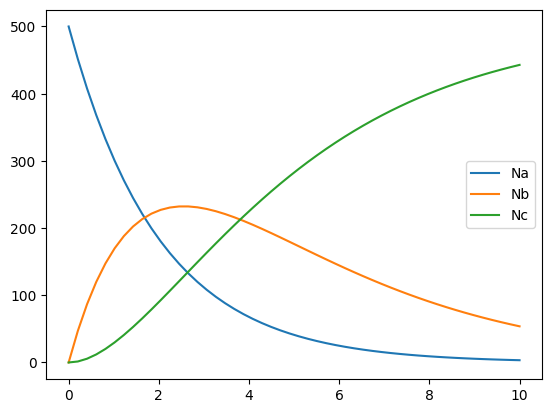

In [191]:
plt.plot(t,sol[:,0],label='Na')
plt.plot(t,sol[:,1],label='Nb')
plt.plot(t,sol[:,2],label='Nc')
plt.legend()

In [192]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1],r[2]])    
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [193]:
def Adaptativo(f,r0,t,e=1e-4):
    h = t[1]-t[0]
    tf = t[-1]
    t0 = t[0]

    r = r0
    Time = np.array([t0])
    Vector = r
    Steps = np.array([h])

    while t0 < tf:
        r1 = Increment(f,r,t0,h)
        r2 = Increment(f,r1,t0+h,h)
        rt = Increment(f,r,t0,2*h)
        error = np.linalg.norm( r2 - rt )

        if error < e:
            t0 += 2*h
            r = rt
            Steps = np.append(Steps,h )
            Time = np.append(Time,t0)
            Vector = np.vstack((Vector,r))

        q = 0.85*(e/error)**(1/4)
        h = h*q

    return Time,Vector,Steps


In [194]:
t2,v,s = Adaptativo(System,r0,t)

In [195]:
a = v[:,0]
b = v[:,1]
c = v[:,2]
len(s)

38

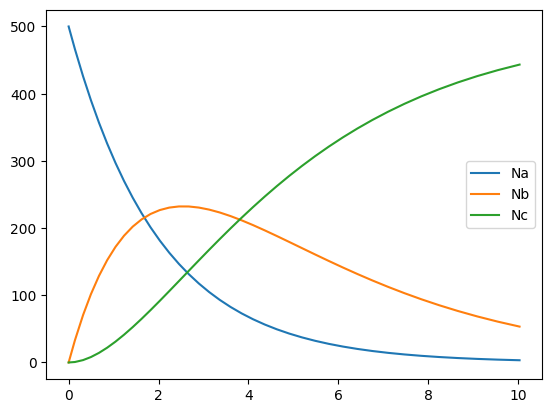

In [196]:
plt.plot(t2,a,label='Na')
plt.plot(t2,b,label='Nb')
plt.plot(t2,c,label='Nc')
plt.legend()

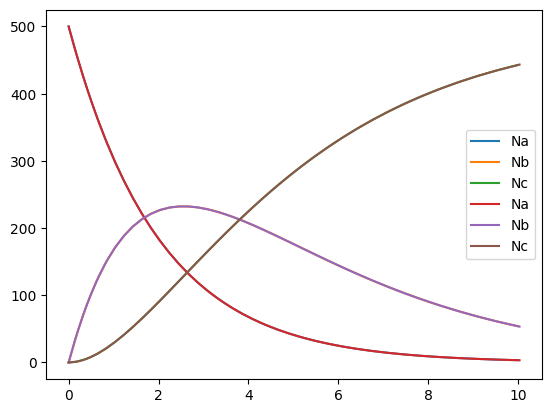

In [197]:
plt.plot(t,sol[:,0],label='Na')
plt.plot(t,sol[:,1],label='Nb')
plt.plot(t,sol[:,2],label='Nc')
plt.plot(t2,a,label='Na')
plt.plot(t2,b,label='Nb')
plt.plot(t2,c,label='Nc')
plt.legend()

In [198]:
bmax = np.max(b)
i = np.where(b==bmax)
i = i[0][0]
t2[i]

2.4520362395696504

In [199]:
a[i]

146.7295259199198

In [200]:
b[i]

232.1920182235683

In [201]:
c[i]

121.0784558565119

Dado que las razones a las cuales cambia el número de patrticulas es proporcional al numero de particulas, para que haya un maximo de particulas B, debe pasar que dNb/dt llegue a un maximo cuando dNa/dt sea muy grande y dNb/dt muy pequeño. El punto donde esta relación llegue a su maximo depende de las razones lambda que tengamos y debería ser proporcional a la diferencia de las lambdas multiplicado por el numero de particulas.